In [2]:
import pandas as pd
import os

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
metadata_df = pd.read_csv("/Users/nipunbatra/w/dataport-metadata.csv",index_col=0)

In [6]:
store = pd.HDFStore("/Users/nipunbatra/wiki-all.h5")

In [7]:
from collections import Counter
counter_dict = {}
for city in ["San Diego", "Boulder", "Austin", "Houston", "Dallas"]:
    print city
    only_city_df = metadata_df[metadata_df['city'] == city]
    counter_dict[city] = Counter()
    for building in only_city_df.index:
        try:
            counter_dict[city].update(store['/%d' %building].resample("1M")['use'].index)
        except:
            pass
    counter_dict[city] = pd.Series(counter_dict[city])
    
    


San Diego
Boulder
Austin
Houston
Dallas


In [9]:
import sys
sys.path.append("../code/")

In [10]:
from common_functions import tableau20blind, format_axes, latexify

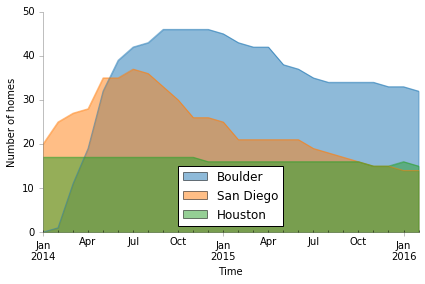

In [11]:

pd.DataFrame(counter_dict)["2014":][["Boulder", "San Diego", "Houston"]].plot(kind="area", stacked=False, 
                                                                              color=tableau20blind[::2])
format_axes(plt.gca())
plt.xlabel("Time")
plt.ylabel("Number of homes")
plt.tight_layout()
plt.savefig("../results/large_dataset_cities.png", bbox_inches="tight")
plt.savefig("../results/large_dataset_cities.pdf", bbox_inches="tight")

In [11]:
stream_counter_dict = {}
#for city in ["San Diego", "Boulder", "Austin", "Houston", "Dallas"]:
for city in ["Austin"]:
    print city
    only_city_df = metadata_df[metadata_df['city'] == city]
    stream_counter_dict[city] = Counter()
    for building in only_city_df.index:
        try:
            stream_counter_dict[city].update(store['/%d' %building].columns)
        except:
            pass
    #stream_counter_dict[city] = pd.Series(counter_dict[city])
    
    

Austin


In [12]:
streams_df = pd.DataFrame(stream_counter_dict)

In [14]:
streams_df.index

Index([u'air1', u'air2', u'air3', u'airwindowunit1', u'aquarium1',
       u'bathroom1', u'bathroom2', u'bedroom1', u'bedroom2', u'bedroom3',
       u'bedroom4', u'bedroom5', u'car1', u'clotheswasher1',
       u'clotheswasher_dryg1', u'diningroom1', u'diningroom2', u'dishwasher1',
       u'disposal1', u'drye1', u'dryg1', u'freezer1', u'furnace1', u'furnace2',
       u'garage1', u'garage2', u'heater1', u'housefan1', u'icemaker1',
       u'jacuzzi1', u'kitchen1', u'kitchen2', u'kitchenapp1', u'kitchenapp2',
       u'lights_plugs1', u'lights_plugs2', u'lights_plugs3', u'lights_plugs4',
       u'lights_plugs5', u'lights_plugs6', u'livingroom1', u'livingroom2',
       u'microwave1', u'office1', u'outsidelights_plugs1',
       u'outsidelights_plugs2', u'oven1', u'oven2', u'pool1', u'pool2',
       u'poollight1', u'poolpump1', u'pump1', u'range1', u'refrigerator1',
       u'refrigerator2', u'security1', u'shed1', u'sprinkler1', u'use',
       u'utilityroom1', u'venthood1', u'waterheater1', u'w

In [14]:
import seaborn as sns

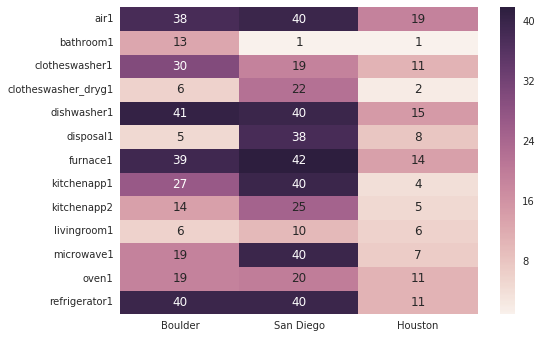

In [17]:
sns.heatmap(streams_df[["Boulder", "San Diego", "Houston"]].dropna().drop("use"), annot=True)
plt.savefig("../results/large_dataset_cities_streams.pdf", bbox_inches="tight")
plt.savefig("../results/large_dataset_cities_streams.png", bbox_inches="tight")

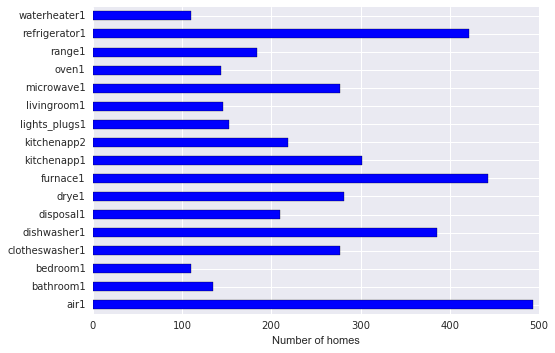

In [18]:
austin = streams_df["Austin"]
austin[austin>100].drop('use').plot(kind="barh")
plt.xlabel("Number of homes")
plt.savefig("../results/large_dataset_austin_streams.pdf", bbox_inches="tight")
plt.savefig("../results/large_dataset_austin_streams.png", bbox_inches="tight")

In [19]:
!ls ~/git/nilm-actionable/data/total/

audits_2011.csv                   audits_2013_duct_leakage_eval.csv dataport-metadata.csv             survey_2013.csv
audits_2013_appliances.csv        audits_2013_main.csv              survey_2011_all_participants.csv


In [20]:
columns_to_use = {
    'survey_2011_all_participants.csv': [
        'males',
        'females',
        'age_under_5',
        'age_6_to_12',
        'age_13_to_18',
        'age_19_to_24',
        'age_25_to_34',
        'age_35_to_49',
        'age_50_to64',
        'age_over_65',
        'highest_education',
        'income_range',
        ],
    'survey_2013.csv': [
        'number_floors',
        'house_num_rooms',
        'house_square_feet',
        'sex_males',
        'sex_females',
        'residents_under_5',
        'residents_6_to_12',
        'residents_13_to_18',
        'residents_19_to_24',
        'residents_25_to_34',
        'residents_35_to_49',
        'residents_50_to_64',
        'residents_older_65',
        'education_level',
        'total_annual_income',
        ],
    'audits_2011.csv': ['no_bedrooms', 'year_built'],
    'audits_2013_main.csv': ['Number_of_Floors__c',
                             'Number_of_Bedrooms__c',
                             'Construction_Year__c'],
    'dataport-metadata.csv':['house_construction_year',
                             'total_square_footage']
    }




In [21]:
metadata_dataframes = {filename: pd.read_csv('/Users/nipunbatra/git/nilm-actionable/data/total/%s' %filename) for filename in columns_to_use.keys()}

### Finding how much metadata we have for each city

In [22]:
metadata_dataframes.keys()

['dataport-metadata.csv',
 'survey_2011_all_participants.csv',
 'survey_2013.csv',
 'audits_2011.csv',
 'audits_2013_main.csv']

In [23]:
counter_dict = {}
out = {}
for city in ["San Diego", "Boulder", "Austin", "Houston", "Dallas"]:
#for city in ["San Diego"]:
    out[city] = {}

    
    print city
    only_city_df = metadata_df[metadata_df['city'] == city]
    counter_dict[city] = Counter()
    for building in only_city_df.index[:]:
        try:
            building=int(building)
            out[city][building] = {}
            for metadata_filename, metadata_columns in columns_to_use.iteritems():
                
                mdf = metadata_dataframes[metadata_filename]
                
                mdf_building = mdf[mdf.dataid==building].head(1)[metadata_columns]
                
                out[city][building].update(mdf_building.squeeze().to_dict())
                
                
                
            
        except Exception, e:
            print e
    
    

San Diego
Boulder
Austin
Houston
Dallas


In [25]:
common_columns = {'year_built':['year_built','house_construction_year','Construction_Year__c'],
                 'area':['house_square_feet','total_square_footage'],
                 'num_floors':['Number_of_Floors__c','number_floors'],
                 'num_bedrooms':['Number_of_Bedrooms__c','no_bedrooms'],
                 'num_males':['males','sex_males'],
                 'num_females':['females','sex_females'],
                 'age_13_to_18':['age_13_to_18','residents_13_to_18'],
                 'age_19_to_24':['age_19_to_24','residents_19_to_24'],
                  'age_25_to_34':['age_25_to_34','residents_25_to_34'],
                  'age_35_to_49':['age_35_to_49','residents_35_to_49'],
                  'age_50_to_64':['age_50_to64','residents_50_to_64'],
                  'age_over_65':['age_over_65','residents_older_65'],
                  'age_6_to_12':['age_6_to_12','residents_6_to_12'],
                  'age_under_5':['age_under_5','residents_under_5'],
                  'education_level':['education_level','highest_education'],
                  'income_range':['income_range','total_annual_income']
                  
                  
                 }

In [42]:
odfs = {}
for city in ["San Diego", "Boulder", "Austin", "Houston"]:
    print city
    odfs[city] = pd.DataFrame(out[city])
    odfs[city] = odfs[city].replace([{}], [None])
    odf = odfs[city]
    odft = odf.T
    out_new = {}
    for common_key, common_list_columns in common_columns.iteritems():
        out_new[common_key]={}
        for home in odft.index:

            num_columns = len(common_list_columns)
            num_null = odft.ix[home][common_list_columns].isnull().sum()
            if num_columns==num_null:
                out_new[common_key][home]=None
            else:
                # Choose first not null
                out_new[common_key][home]=odft.ix[home][common_list_columns].dropna().head(1).values[0]

        for col in common_list_columns:

            odft = odft.drop(col, axis=1)
        odft[common_key] = pd.Series(out_new[common_key])
    odfs[city]=odft.T
    #odfs[city]=odft.T.notnull().sum(axis=1)

    

San Diego
Boulder
Austin
Houston


In [27]:
pd.DataFrame(odfs).plot(kind="bar", color=tableau20blind[::2], subplots=True, figsize=(12,8))
fig = plt.gcf()
fig.text(-0.02, 0.5, "Number of homes", va='center', rotation='vertical')

plt.tight_layout()
plt.savefig("../results/metadata.png", bbox_inches="tight")
plt.savefig("../results/metadata.pdf", bbox_inches="tight")

ValueError: If using all scalar values, you must pass an index

In [43]:
for city in odfs.keys():
    odfs[city] = odfs[city].ix[['house_num_rooms','num_males','num_females','area']].T.dropna()
    odfs[city] = odfs[city].replace({'5 or more':5})
    odfs[city] = odfs[city].replace({"None":0})
    odfs[city] = odfs[city].astype('float64')
    odfs[city]["num_occupants"] = odfs[city].num_females+odfs[city].num_males
    odfs[city] = odfs[city].drop("num_males",1)
    odfs[city] = odfs[city].drop("num_females",1)
    odfs[city] = odfs[city].query('num_occupants>0')



In [49]:
for city in odfs.keys():
    odfs[city].to_csv('../data/input/%s_md.csv' %city.replace(" ",""))
    